##KNN (House *Pricing*)


In [ ]:
#importer les librairies necessaires pour exécuter les instructions: pandas:manipuler des tableaux de données
#numpy: permet d’effectuer des calculs numériques//seaborn pour data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import io

In [ ]:
#ouvrir et lire le fichier

  #from google.colab import files
  #uploaded = files.upload()
  # kc = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
kc = pd.read_csv('/content/kc_house_data.csv')
kc=kc.fillna(method='ffill')


# afficher les noms de toutes les colonnes.
print(kc.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [ ]:
#afficher les données(les 5 premières lignes)
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.405497,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090420,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#ajuster le forme de la date
kc['date'] = pd.to_datetime(kc['date'])

In [ ]:
#verifier s'il y a des valeurs nulles
kc.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

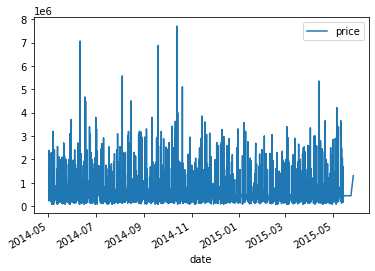

In [ ]:
#afficher la relation entre le prix et la date sous forme d'une graphe
kc.plot(y='price', x='date')
plt.show()

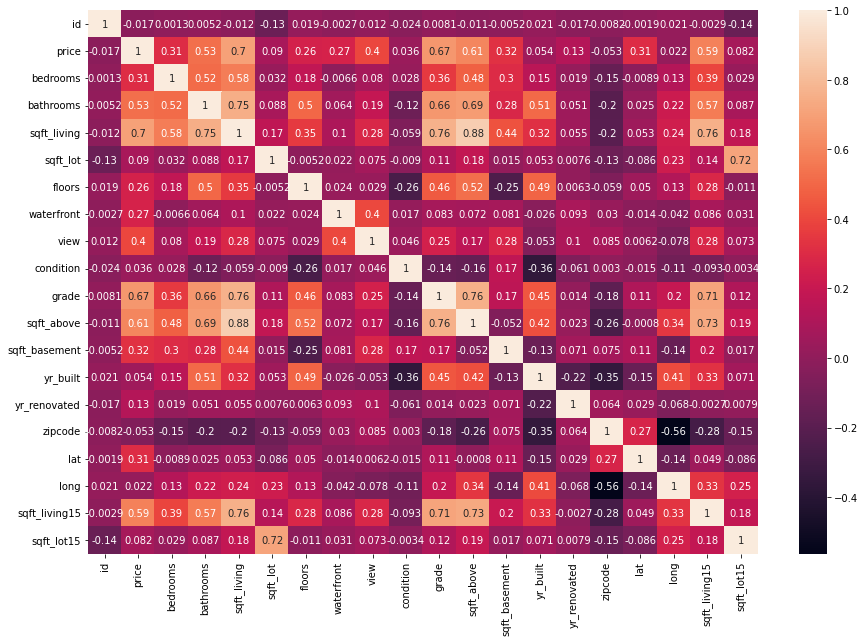

In [ ]:
#afficher la matrice de corrélation entre les différents attributs du dataset
mcor = kc.corr()
plt.figure(figsize=(15,10))
sns.heatmap(mcor, annot=True)
plt.show()

In [ ]:
#importer les librairies necessaires pour servir le modele knn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
#les colonnes que je vais utiliser pour la prediction
x_columns = kc[['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above',
 'sqft_basement','lat','long','sqft_living15','sqft_lot15']]

#la colonne que je veux predire
y_column = kc["price"]


#la fonction train_test_split fractionne l’ensemble des données en données de train et de test qui sont par défaut à 75/25 %.
x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

#k représente le nombre de voisins
for k in range(20):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
#On entraine le KNeighborsRegressor à l’aide de fit() qu’on lui passe en paramètres x_train et y_train.
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)


Regression score is: 0.3536 for k_value: 1
Regression score is: 0.3748 for k_value: 2
Regression score is: 0.3628 for k_value: 3
Regression score is: 0.3343 for k_value: 4
Regression score is: 0.3321 for k_value: 5
Regression score is: 0.3161 for k_value: 6
Regression score is: 0.2998 for k_value: 7
Regression score is: 0.2884 for k_value: 8
Regression score is: 0.2781 for k_value: 9
Regression score is: 0.2681 for k_value: 10
Regression score is: 0.2587 for k_value: 11
Regression score is: 0.2451 for k_value: 12
Regression score is: 0.2379 for k_value: 13
Regression score is: 0.2298 for k_value: 14
Regression score is: 0.2232 for k_value: 15
Regression score is: 0.2145 for k_value: 16
Regression score is: 0.2035 for k_value: 17
Regression score is: 0.1962 for k_value: 18
Regression score is: 0.1883 for k_value: 19
Regression score is: 0.1814 for k_value: 20


In [ ]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Regression score is: 0.3748


In [ ]:
Test_With_Predicted = pd.DataFrame({'Actual price': y_test.tolist(), 'Predicted price': y_pred.tolist()})

Test_With_Predicted

,Actual price,Predicted price
0,297000.0,292000.0
1,1578000.0,1037500.0
2,562100.0,546000.0
3,631500.0,883500.0
4,780000.0,480000.0
...,...,...
6479,1100000.0,856500.0
6480,700000.0,793050.0
6481,380000.0,269000.0
6482,268000.0,232500.0
